In [696]:
#init 

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

f = "./100000pkt_parse.txt"
total_line = 500000
#num_type = 4
num_type = 6

time = np.loadtxt(f,delimiter=',',usecols=[0],dtype=float)
p_type = np.loadtxt(f,delimiter=',',usecols=[1],dtype=str)
p_len = np.loadtxt(f,delimiter=',',usecols=[2],dtype=int)

In [685]:
print(time[0])
print(time[total_line-1])

50.788775
53.124784


In [697]:
for i in range(total_line):
    time[i] = int(time[i] * 10)
    #time[i] = int(time[i] -  1000000)

time[0]

507.0

In [698]:
time[total_line-1]

531.0

In [699]:
# devide time by time unit
div_unit = 1

unit_time = [];
for i in range(total_line):
        unit_time.append(int(time[i]/div_unit))

In [700]:
unit_time[total_line - 1]

531

In [701]:
# get a count of traffic by time unit

init_time = unit_time[0]
traffic_range = unit_time[total_line-1]%init_time + 1
#traffic_range = 234
counter = list(range(traffic_range))

for i in range(traffic_range):
    counter[i] = 0;
    
for i in range(total_line):
    counter[unit_time[i]-init_time] += 1;

#for i in range(traffic_range):
 #   print(counter[i]);

In [702]:
cluster = np.ones((traffic_range,num_type),dtype={"names":("ptype","len"),"formats":("str","int")})

In [602]:
start = 0;

for i in range(traffic_range):
    for k in range(num_type):
        cluster[i][k][1] = 0;

for i in range(traffic_range):
    for k in range(counter[i]):
        offset = k + start;
        if p_type[offset] == "MWr":
            cluster[i][0][1] += p_len[offset]
        elif p_type[offset] == "MRd":
            cluster[i][1][1] += p_len[offset]
        elif p_type[offset] == "CplD":
            cluster[i][2][1] += p_len[offset]
    start += k;



In [613]:
start = 0;

for i in range(traffic_range):
    for k in range(num_type):
        cluster[i][k][1] = 0;

for i in range(traffic_range):
    for k in range(counter[i]):
        offset = k + start;
        if p_type[offset] == "MWr":
            if p_len[offset] == 2:
                cluster[i][0][1] += p_len[offset]
            elif p_len[offset] == 1:
                 cluster[i][1][1] += p_len[offset]
        elif p_type[offset] == "MRd":
            cluster[i][2][1] += p_len[offset]
        elif p_type[offset] == "CplD":
            cluster[i][3][1] += p_len[offset]
    start += k;

In [703]:
start = 0;

for i in range(traffic_range):
    for k in range(num_type):
        cluster[i][k][1] = 0;

for i in range(traffic_range):
    for k in range(counter[i]):
        offset = k + start;
        if p_type[offset] == "MWr":
            if p_len[offset] == 2:
                cluster[i][0][1] += p_len[offset]
            elif p_len[offset] == 1:
                 cluster[i][1][1] += p_len[offset]
            else:
                print(p_len[offset])
                print("errrrrrrrrrroooooooooooooor!")
        elif p_type[offset] == "MRd":
            if p_len[offset] == 4:
                 cluster[i][2][1] += p_len[offset]
            else:
                 cluster[i][3][1] += p_len[offset]
        elif p_type[offset] == "CplD":
            if  p_len[offset] == 4:
                cluster[i][4][1] += p_len[offset]
            else:
                cluster[i][5][1] += p_len[offset]

    start += k;

In [704]:
traffic_range

25

<function matplotlib.pyplot.show(*args, **kw)>

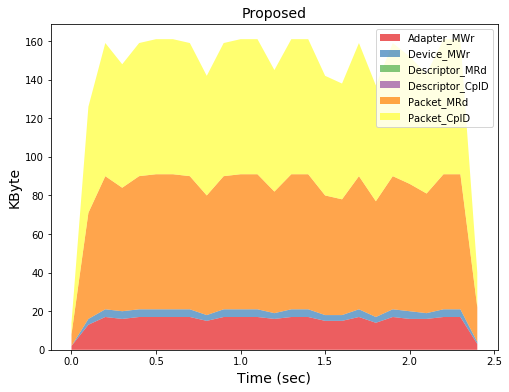

In [709]:
import seaborn as sns

# unit based on sec or msec
unit = 10
x_start = 0
x_tol = 1 / unit
x_end = 2.5
#x_end = (unit_time[total_line-1] - unit_time[0])/unit + x_tol*2

x = np.arange(x_start,x_end,x_tol)
#y_mwr = np.arange(traffic_range)
#y_mrd = np.arange(traffic_range)
#y_cpid = np.arange(traffic_range)

a_y_mwr = np.arange(traffic_range)
d_y_mwr = np.arange(traffic_range)
d_y_mrd = np.arange(traffic_range)
d_y_cpid = np.arange(traffic_range)
p_y_mrd = np.arange(traffic_range)
p_y_cpid = np.arange(traffic_range)


#labels = ["MWr","MRd","CpID"]
labels = ["Adapter_MWr","Device_MWr","Descriptor_MRd","Descriptor_CpID","Packet_MRd","Packet_CpID"]

for i in range(traffic_range):
   # y_mwr[i] = cluster[i][0][1]/1024;
    #y_mrd[i] = cluster[i][1][1]/1024; 
    #y_cpid[i] = cluster[i][2][1]/1024;
    a_y_mwr[i] = cluster[i][0][1]/1024;
    d_y_mwr[i] = cluster[i][1][1]/1024;
    d_y_mrd[i] = cluster[i][2][1]/1024; 
    p_y_mrd[i] = cluster[i][3][1]/1024;
    d_y_cpid[i] = cluster[i][4][1]/1024; 
    p_y_cpid[i] = cluster[i][5][1]/1024;


pal = sns.color_palette("Set1")
fig, ax = plt.subplots(figsize=(8,6))
#ax.stackplot(x,y_mwr,y_mrd,y_cpid,labels=labels,colors=pal,alpha=0.5)
#ax.stackplot(x,a_y_mwr,d_y_mwr,y_mrd,y_cpid,labels=labels,colors=pal,alpha=0.3)
ax.stackplot(x,a_y_mwr,d_y_mwr,d_y_mrd,d_y_cpid,p_y_mrd,p_y_cpid,labels=labels,colors=pal,alpha=0.7)

ax.set_xlabel("Time (sec)",size=14)
ax.set_ylabel("KByte",size=14)
ax.set_title("Proposed",size=14)
ax.legend(loc="best")
#plt.ylim([0,50])
#plt.xlim(0.0, 4.20)   

plt.savefig("./proposed_dump_stackg/100000pkt_pic/01sec_4col_x4.png",dpi=300) 

plt.show